<a href="https://colab.research.google.com/github/gustavocxavier/exemplos-codigos-py/blob/main/previsao_notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio

In [27]:
# !pip install matplotlib==3.2.2
# !pip install matplotlib --upgrade
!pip install pandas_datareader --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [28]:
%matplotlib inline

import numpy as np
import random
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [32]:
## Feedforward NN for financial data
# Download financial data:
from pandas_datareader.data import DataReader
from datetime import datetime
import pandas as pd

myData = DataReader(["AAPL"],"yahoo",datetime(2010,1,1),datetime(2022,10,24)) 
A = myData["Adj Close"]["AAPL"]

myData = DataReader(["MSFT"],"yahoo",datetime(2010,1,1),datetime(2021,10,24)) 
B = myData["Adj Close"]["MSFT"]

In [33]:
df = pd.DataFrame({'A': A,'B': B})
df_r = np.log(df) - np.log(df.shift(1))
df_r[['A_1', 'B_1']] = df_r.shift(1)
df_r[['A_2', 'B_2']] = df_r[['A', 'B']].shift(2)
df_r = df_r.dropna()
df_r.head(5)

,A,B,A_1,B_1,A_2,B_2
Date,,,,,,
2010-01-07,-0.001851,-0.010454,-0.016034,-0.006156,0.001728,0.000323
2010-01-08,0.006626,0.006873,-0.001851,-0.010454,-0.016034,-0.006156
2010-01-11,-0.008861,-0.012802,0.006626,0.006873,-0.001851,-0.010454
2010-01-12,-0.011440,-0.006629,-0.008861,-0.012802,0.006626,0.006873
2010-01-13,0.014007,0.009269,-0.011440,-0.006629,-0.008861,-0.012802


In [34]:
X, y = df_r[['A_1', 'A_2', 'B_1','B_2']], df_r[['A']]
# display(X.head())
# display(X.tail())
# display(y.head())
# display(y.tail())

In [35]:
n_train = round(y.size*0.80)
# train_X = r[0:2500]
# test_X = r[2500:3019]
train_X = X.to_numpy()[0:n_train]
test_X = X.to_numpy()[n_train:-1]


# train_y = r[1:2501]
# test_y = r[2501:3020]
train_y = y.to_numpy()[1:(n_train+1)]
test_y = y.to_numpy()[(n_train+1):]


$r_{A,t} = \beta_0 + \beta_{1} r_{A,t-1} + \beta_{2} r_{1,t-2} + \beta_{3} r_{B,t-1} + \beta_{4} r_{B,t-2}$

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


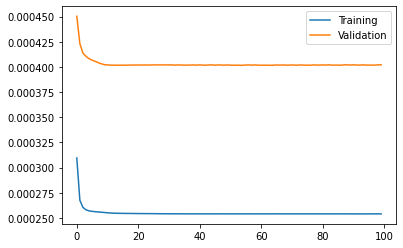

Training MSE: 0.0002540225978009403
Validation MSE: 0.00040211007581092417
Test MSE: 0.0004958374192938209
Compare with AR(1): 0.0004992738758039772


In [36]:
# Construct neural network
HIDDEN = 2
NN = keras.Sequential()
NN.add(keras.layers.Dense(HIDDEN, input_dim=train_X.shape[1],activation='relu')) #1 input x
# NN.add(keras.layers.Dense(HIDDEN, activation='relu'))
NN.add(keras.layers.Dense(1, activation='linear')) #1 output y

NN.summary()

# State the loss function and optimizer (adam is a good choice usually)
NN.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')

# Fit the model to training data
EPOCHS = 100 # How long to train for (cut off early)
history = NN.fit(train_X,train_y, epochs=EPOCHS, validation_split=0.1,
                 shuffle=False, verbose=0)
# View improvement over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.show()
print('Training MSE:',history.history['loss'][-1]) # Training MSE
print('Validation MSE:', history.history['val_loss'][-1]) # Validation loss

# Evaluate on test data
print('Test MSE:', NN.evaluate(test_X , test_y , verbose=0)) # Test MSE


# How does this compare with an AR(1) model
XX = np.vstack([np.ones(len(train_X[:,0])),train_X[:,0]]).T
b0,b1 = np.linalg.lstsq(XX,train_y,rcond=None)[0]

# Compute MSE
print('Compare with AR(1):', np.mean(((b0+b1*test_X) - test_y)**2))


# How should we modify this NN to consider 2+ lags?
# What other network structures should we try?

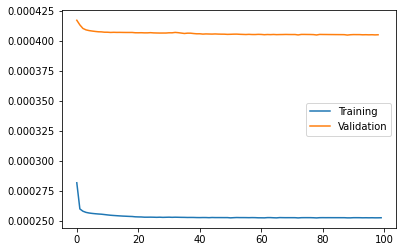

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'][:-1])
plt.legend(['Training','Validation'])
plt.show()


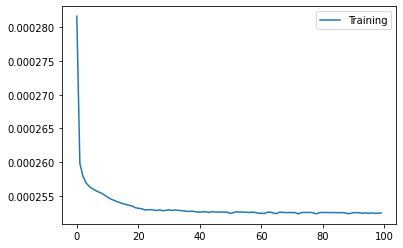

In [14]:
plt.plot(history.history['loss'])
plt.legend(['Training'])
plt.show()

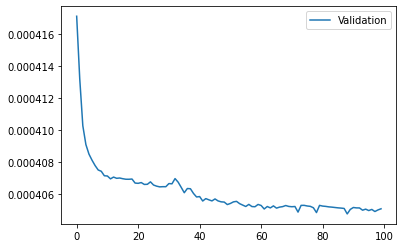

In [15]:
plt.plot(history.history['val_loss'])
plt.legend(['Validation'])
plt.show()

Training MSE: 0.0002538338303565979

Validation MSE: 0.0004063052765559405

Test MSE: 0.0005042432458139956

Compare with AR(1): 0.0005017716532750181

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


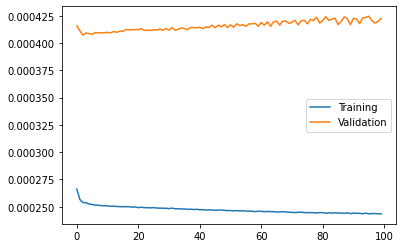

Training MSE: 0.00024341409152839333
Validation MSE: 0.00042260761256329715
Test MSE: 0.0005025836871936917
Compa#re with AR(1): 0.00049814963971763


In [16]:
# Another neural network

# Construct neural network
HIDDEN = 32
NN2 = keras.Sequential()
NN2.add(keras.layers.Dense(HIDDEN, input_dim=train_X.shape[1],activation='relu')) #1 input x
# NN.add(keras.layers.Dense(HIDDEN, activation='relu'))
NN2.add(keras.layers.Dense(1, activation='linear')) #1 output y

NN2.summary()

# State the loss function and optimizer (adam is a good choice usually)
NN2.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')

# Fit the model to training data
EPOCHS = 100 # How long to train for (cut off early)
history = NN2.fit(train_X,train_y, epochs=EPOCHS, validation_split=0.1,
                 shuffle=False, verbose=0)
# View improvement over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.show()
print('Training MSE:',history.history['loss'][-1]) # Training MSE
print('Validation MSE:', history.history['val_loss'][-1]) # Validation loss

# Evaluate on test data
print('Test MSE:', NN.evaluate(test_X , test_y , verbose=0)) # Test MSE


# How does this compare with an AR(1) model
XX = np.vstack([np.ones(len(train_X[:,0])),train_X[:,0]]).T
b0,b1 = np.linalg.lstsq(XX,train_y,rcond=None)[0]

# Compute MSE
print('Compa#re with AR(1):', np.mean(((b0+b1*test_X) - test_y)**2))


# How should we modify this NN to consider 2+ lags?
# What other network structures should we try?

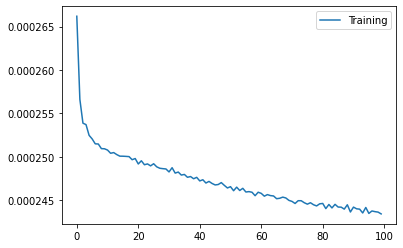

In [17]:
plt.plot(history.history['loss'])
plt.legend(['Training'])
plt.show()

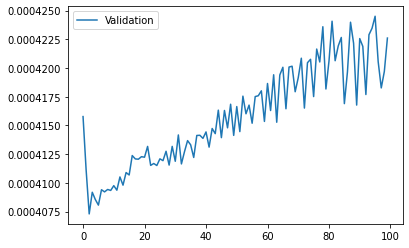

In [18]:
# Overfitting
plt.plot(history.history['val_loss'])
plt.legend(['Validation'])
plt.show()


In [19]:
## Advanced topics:
## Recurrent NN and LSTM NN

#NN = keras.Sequential()
#NN.add(keras.layers.Embedding(input_dim=1 , output_dim=2))
#NN.add(keras.layers.SimpleRNN(16)) # 16 hidden nodes; tanh activation by default
#NN.add(keras.layers.Dense(1, activation='linear')) # 1 output

NN = keras.Sequential()
NN.add(keras.layers.Embedding(input_dim=1 , output_dim=2))
NN.add(keras.layers.LSTM(2)) # 16 hidden nodes; tanh activation by default
NN.add(keras.layers.Dense(1, activation='linear')) # 1 output

NN.summary()

NN.compile(optimizer=keras.optimizers.Adam(),loss='mean_squared_error')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 2)           2         
                                                                 
 lstm (LSTM)                 (None, 2)                 40        
                                                                 
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [20]:
EPOCHS = 100 
history = NN.fit(train_X,train_y,epochs=EPOCHS,batch_size=32, shuffle=False, validation_split=0.1, verbose=0) # Batches help avoid overfitting
print(history.history['loss'][-1]) # Training MSE


0.0002533225924707949


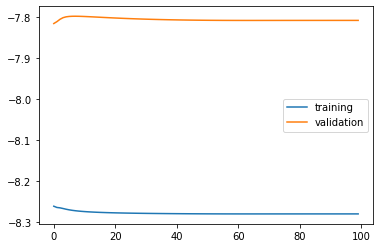

In [21]:
# View improvement over epochs
plt.plot(np.log(history.history['loss']))
plt.plot(np.log(history.history['val_loss']))
plt.legend(['training', 'validation'])
plt.show()


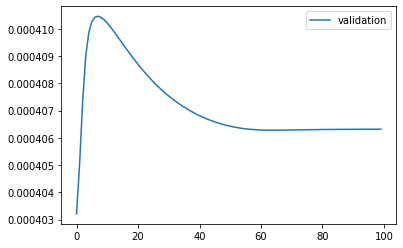

In [22]:
plt.plot(history.history['val_loss'])
plt.legend(['validation'])
plt.show()

In [23]:
NN.evaluate(test_X , test_y)

19/19 [==============================] - 0s 2ms/step - loss: 4.9631e-04


0.000496310880407691

In [24]:
# Evaluate on test data
print(NN.evaluate(test_X , test_y , verbose=0)) # Test MSE

0.000496310880407691


In [25]:
# Other packages exist to do neural networks
# -> Tensorflow is more customizable but less user friendly
# -> PyTorch is newer and gaining popularity